# **IntelliHack Task 01 - Notebook**

## **Install and Import Libraries**

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl imbalanced-learn xgboost catboost

In [2]:
# Import essential libraries
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt  
import seaborn as sns     
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.impute import SimpleImputer
import imblearn

## **Dataset Import and Overview**

In [3]:
df = pd.read_csv('weather_data.csv')

In [4]:
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


## **01. Data Pre-Processing**

In [5]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [6]:
print(df.dtypes)

date                object
avg_temperature    float64
humidity           float64
avg_wind_speed     float64
rain_or_not         object
cloud_cover        float64
pressure           float64
dtype: object


In [7]:
df.shape

(311, 7)

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


In [9]:
# Create a copy of the original DataFrame
df_clean = df.copy()

# Convert specified columns to float using vectorized operation
cols_to_convert = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
df_clean[cols_to_convert] = df_clean[cols_to_convert].astype(float)

# Handle missing values with median (vectorized approach)
median_values = df_clean[cols_to_convert].median()
df_clean[cols_to_convert] = df_clean[cols_to_convert].fillna(median_values)

# Standardize numerical features
scaler = StandardScaler()
df_clean[cols_to_convert] = scaler.fit_transform(df_clean[cols_to_convert])

# Process date feature using vectorized string operations
df_clean['month'] = df_clean['date'].str.split("-").str[1]
df_clean['day'] = df_clean['date'].str.split("-").str[2]
df_clean = df_clean.drop('date', axis=1)

# Encode target variable using dictionary mapping
df_clean['rain_or_not'] = df_clean['rain_or_not'].map({'Rain': 1, 'No Rain': 0})

In [10]:
# Check for missing values in each column
missing_values = df_clean.isnull().sum()
print(missing_values)

avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
month              0
day                0
dtype: int64


# **02. Exploratory Data Analysis(EDA)**

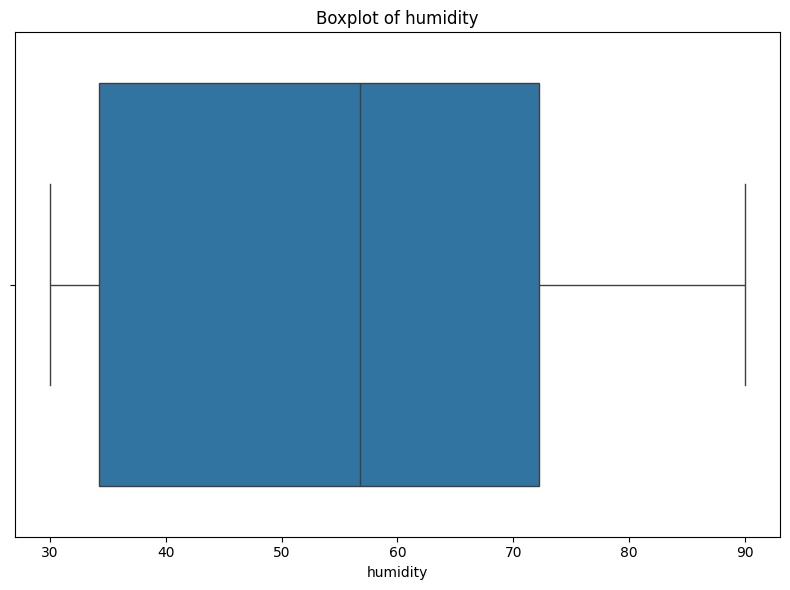

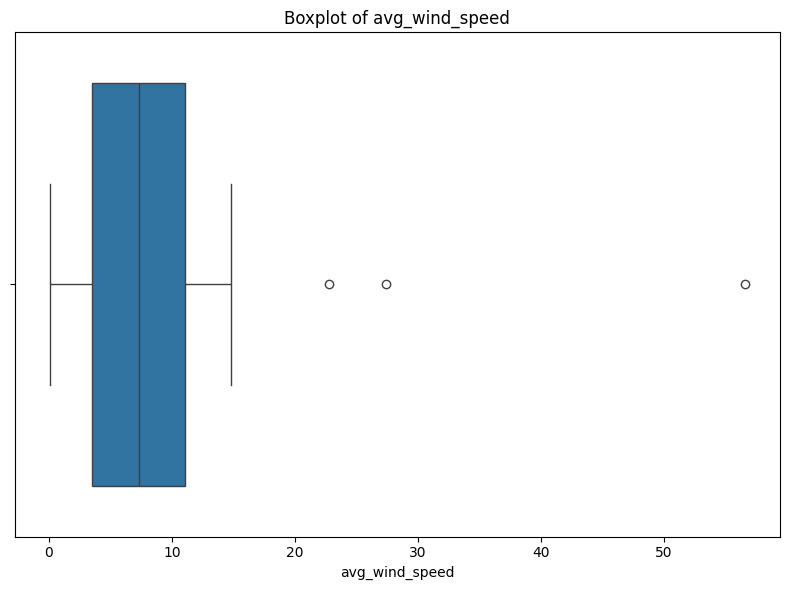

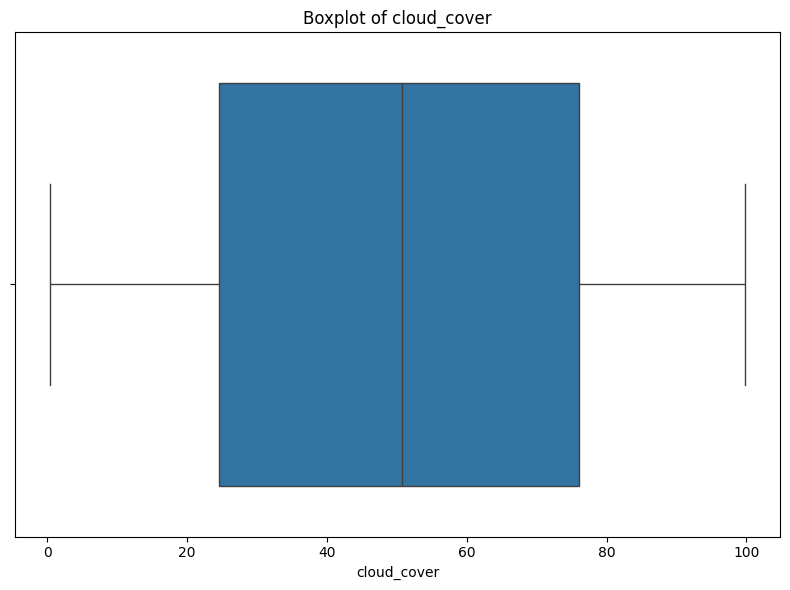

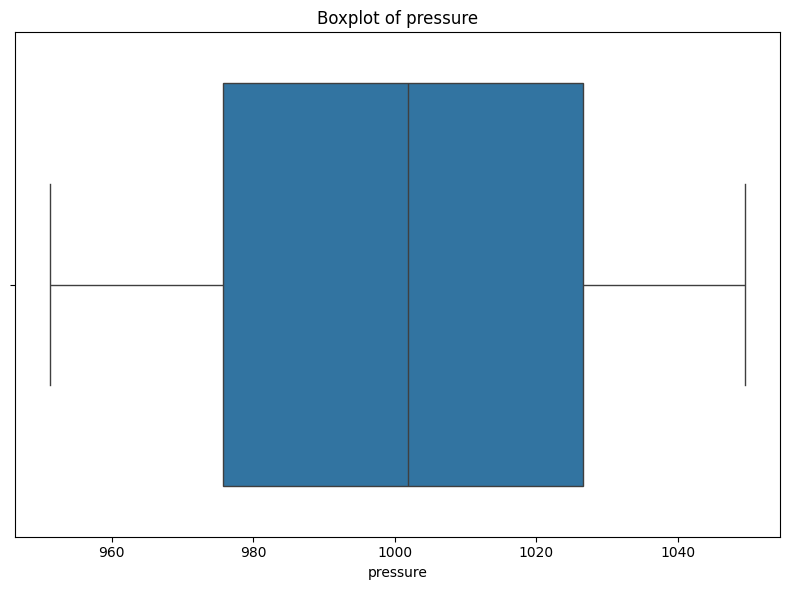

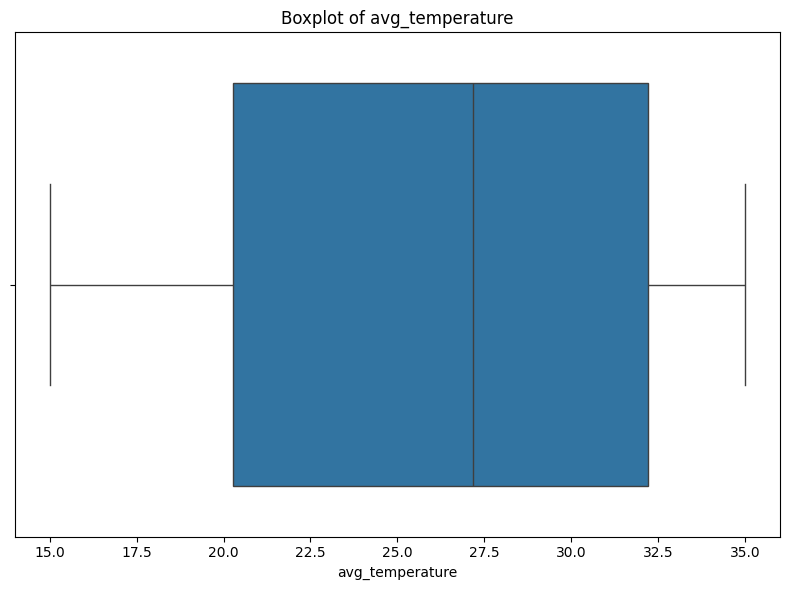

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_check_outliers = ['humidity', 'avg_wind_speed', 'cloud_cover', 'pressure', 'avg_temperature']

for feature in features_to_check_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    
    # Save each plot with a unique filename
    plt.savefig(f'./output/boxplot_{feature}.png', dpi=300)
    
    plt.show()
    plt.close()  # Close the figure to free memory


In [12]:
# Filter rows where avg_wind_speed is an outlier
outliers = df[df['avg_wind_speed'] > 30]  # Adjust threshold based on your whisker
print(outliers[['avg_wind_speed', 'rain_or_not']])

    avg_wind_speed rain_or_not
60       56.636041        Rain


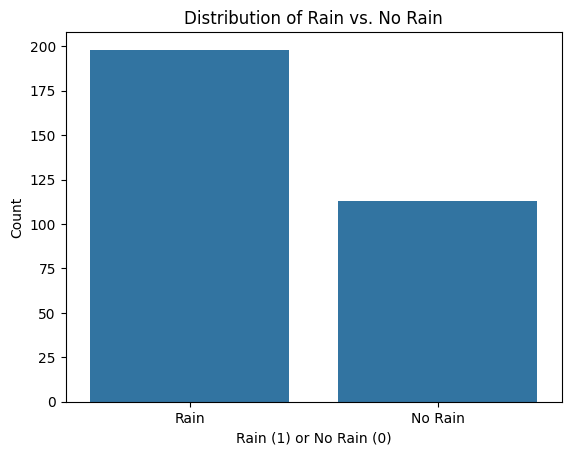

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'rain_or_not'
sns.countplot(x='rain_or_not', data=df)
plt.title('Distribution of Rain vs. No Rain')
plt.xlabel('Rain (1) or No Rain (0)')
plt.ylabel('Count')
plt.show()

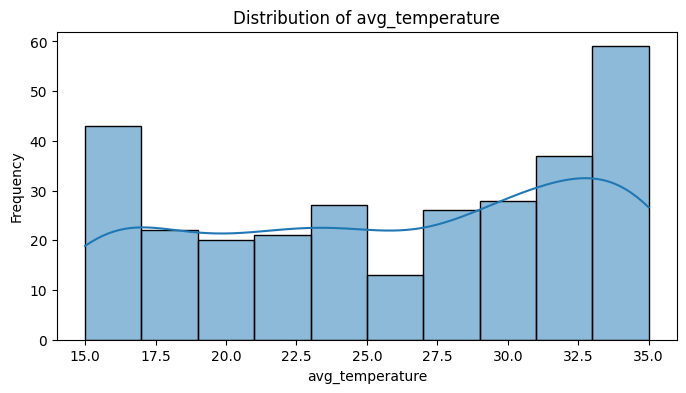

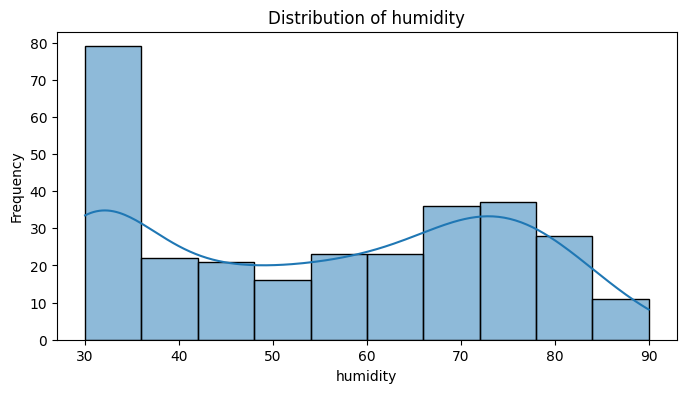

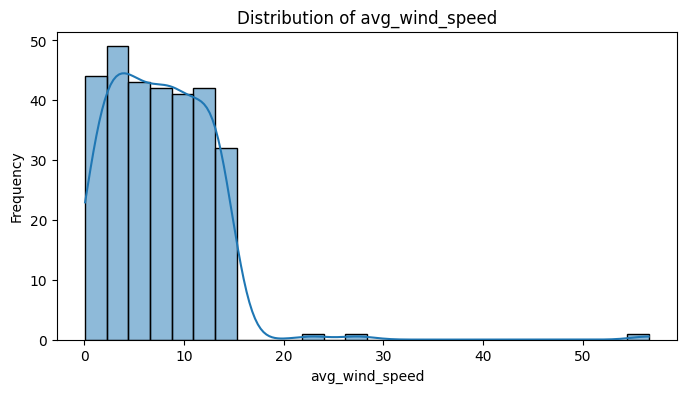

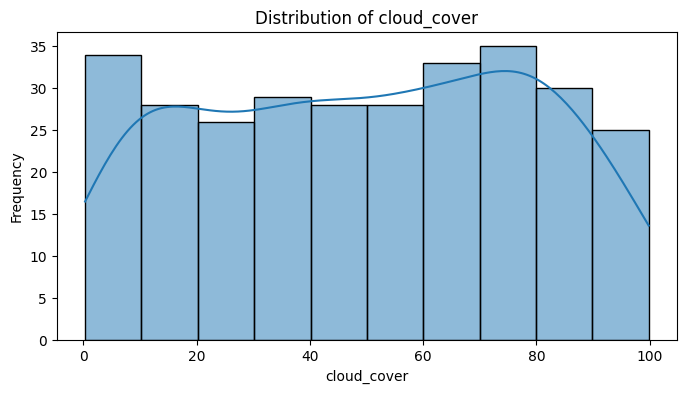

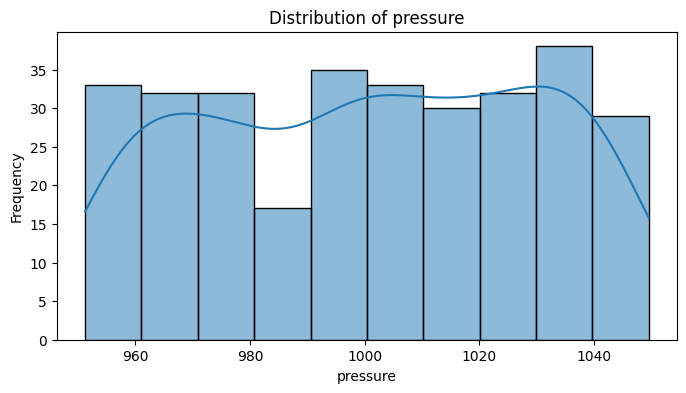

In [14]:
# List of numerical features
numerical_features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# Create histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

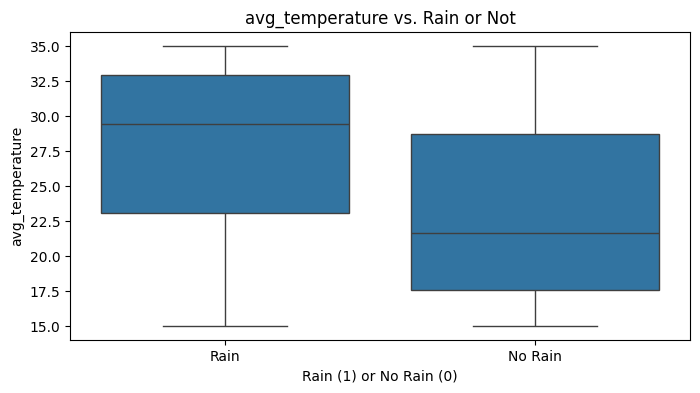

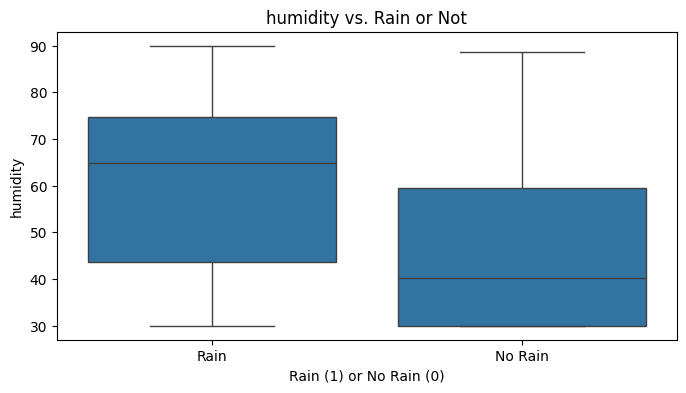

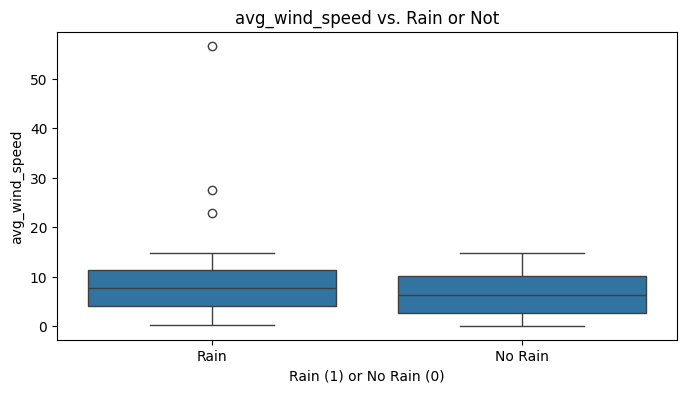

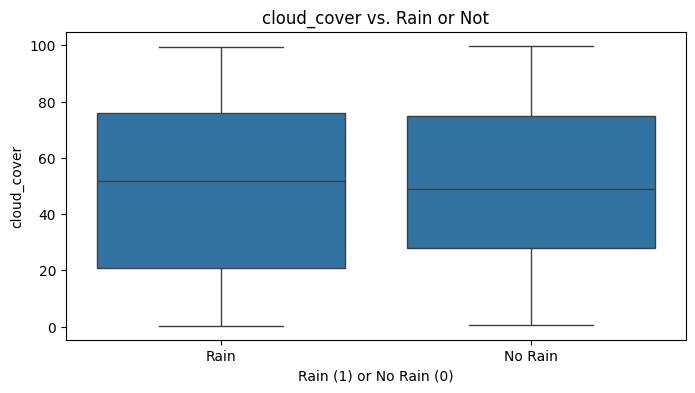

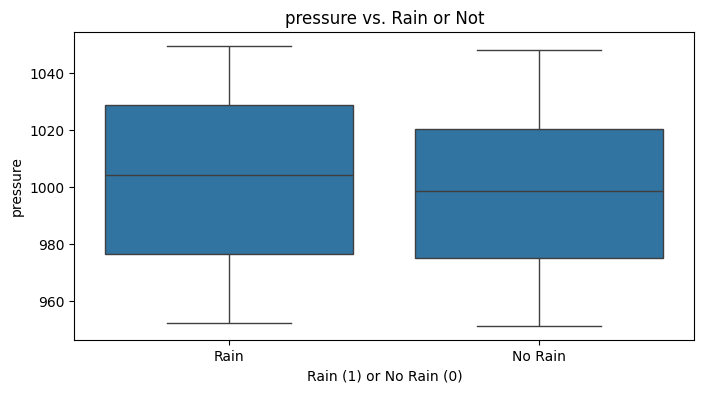

In [15]:
# Create box plots for each numerical feature grouped by 'rain_or_not'
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='rain_or_not', y=feature, data=df)
    plt.title(f'{feature} vs. Rain or Not')
    plt.xlabel('Rain (1) or No Rain (0)')
    plt.ylabel(feature)
    plt.show()

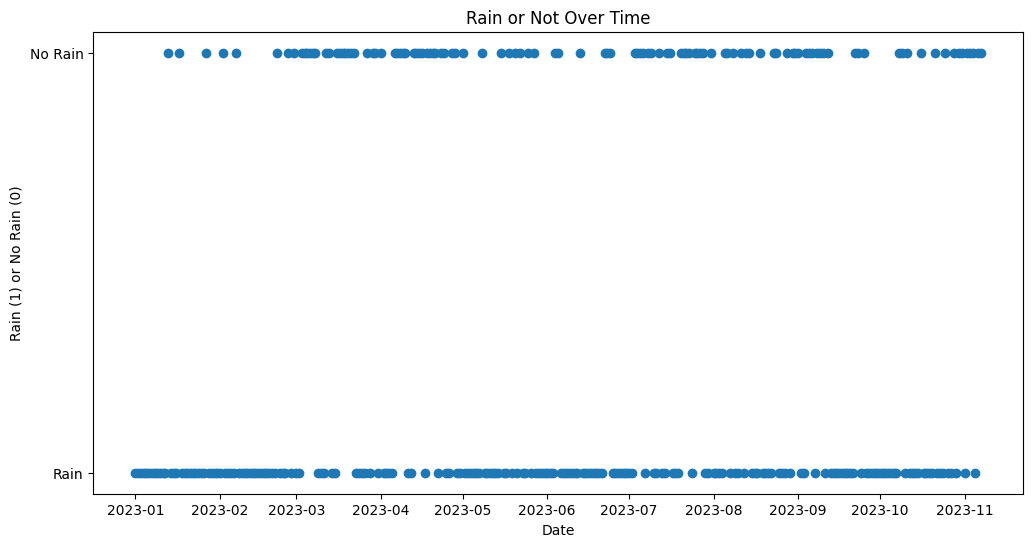

In [16]:
import pandas as pd

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot 'rain_or_not' over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rain_or_not'], marker='o', linestyle='None')
plt.title('Rain or Not Over Time')
plt.xlabel('Date')
plt.ylabel('Rain (1) or No Rain (0)')
plt.show()

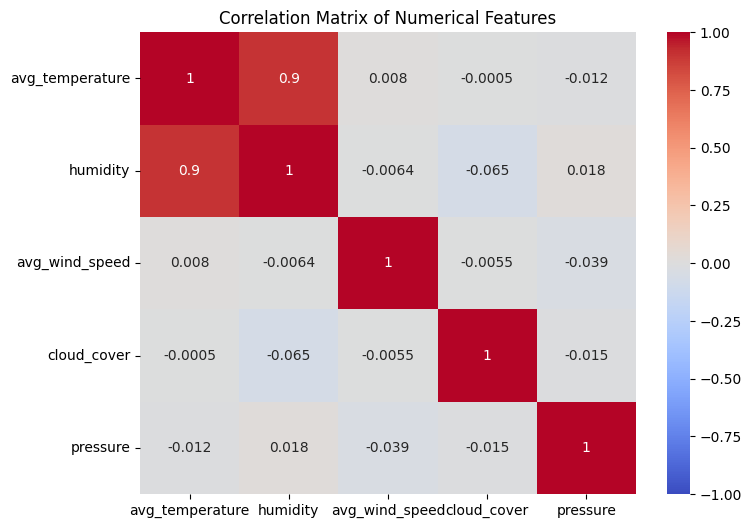

In [17]:
# Select numerical features for correlation
corr_matrix = df[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

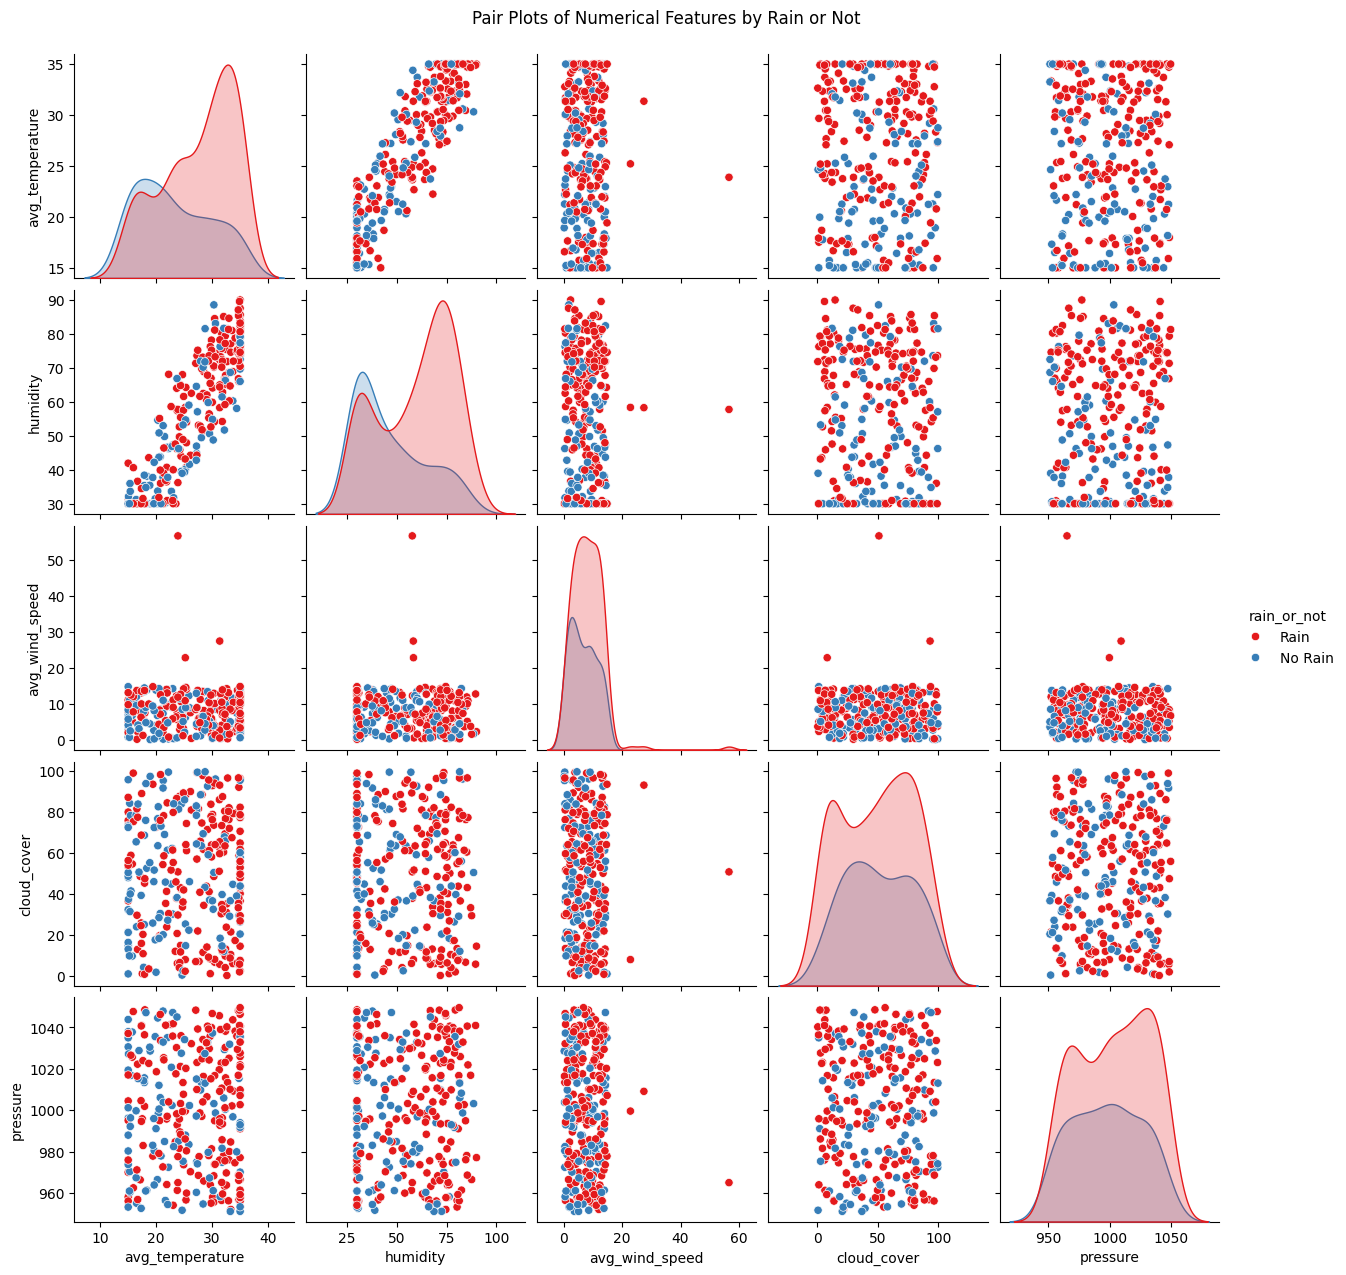

In [18]:
# Create pair plots for numerical features, colored by 'rain_or_not'
sns.pairplot(df, vars=numerical_features, hue='rain_or_not', palette='Set1')
plt.suptitle('Pair Plots of Numerical Features by Rain or Not', y=1.02)
plt.show()

In [19]:
# Group by 'rain_or_not' and compute summary statistics
summary_stats = df.groupby('rain_or_not')[numerical_features].describe()

# Display the summary statistics
print(summary_stats)

            avg_temperature                                                   \
                      count       mean       std   min        25%        50%   
rain_or_not                                                                    
No Rain               107.0  23.252155  6.642881  15.0  17.537155  21.644216   
Rain                  189.0  27.530349  6.409228  15.0  23.042613  29.404586   

                             humidity             ... cloud_cover             \
                   75%   max    count       mean  ...         75%        max   
rain_or_not                                       ...                          
No Rain      28.727272  35.0    107.0  46.617437  ...   74.736796  99.834751   
Rain         32.922214  35.0    189.0  59.810498  ...   76.028982  99.486632   

            pressure                                                  \
               count         mean        std         min         25%   
rain_or_not                                           

## Model Selection and Training

In [20]:
# Data Preparation
processed_data = df_clean[df_clean.columns.difference(['month', 'day'])].copy()

# Outlier trimming using quantile-based filtering
numeric_columns = ['avg_wind_speed', 'avg_temperature', 'humidity']
for col in numeric_columns:
    upper_limit = processed_data[col].quantile(0.95)
    processed_data = processed_data[processed_data[col] <= upper_limit]

# Feature engineering
processed_data = processed_data.assign(
    dew_point=lambda x: x['avg_temperature'] - (100 - x['humidity']) / 5
)

# Data Splitting
predictors = processed_data.drop(columns=['rain_or_not'])
target_var = processed_data['rain_or_not']
X_tr, X_te, y_tr, y_te = train_test_split(
    predictors, target_var, test_size=0.2, random_state=32
)

# Model Configuration
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

algorithms = {
    'Logistic': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'SupportVM': SVC(),
    'DT': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'GBM': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}

hyperparams = {
    'Logistic': {'C': [0.1, 1, 10]},
    'RF': {'n_estimators': [50, 100, 200]},
    'SupportVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'DT': {'max_depth': [None, 10, 20]},
    'KNeighbors': {'n_neighbors': [3, 5, 7]},
    'GaussianNB': {},
    'GBM': {'n_estimators': [50, 100, 200]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'ExtraTrees': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100], 'learning_rate': [0.05, 0.1]}
}

# Model Training and Evaluation
optimized_models = {}
performance_records = []

for model_name, estimator in algorithms.items():
    # Hyperparameter tuning
    search = GridSearchCV(
        estimator, 
        hyperparams.get(model_name, {}), 
        cv=5, 
        scoring='f1'
    )
    search.fit(X_tr, y_tr)
    
    # Store optimized model
    optimized_models[model_name] = search.best_estimator_
    
    # Model evaluation
    predictions = search.best_estimator_.predict(X_te)
    model_f1 = f1_score(y_te, predictions)
    model_accuracy = accuracy_score(y_te, predictions)
    
    # Store performance
    performance_records.append({
        'Model': model_name,
        'F1': model_f1,
        'Accuracy': model_accuracy,
        'Best Params': search.best_params_
    })
    
    # Display metrics
    print(f"## {model_name} ##")
    print(f"Optimal Parameters: {search.best_params_}")
    print(f"Validation F1: {model_f1:.3f}")
    print(f"Accuracy: {model_accuracy:.3f}")
    print(classification_report(y_te, predictions))
    
    # Confusion matrix visualization
    conf_matrix = confusion_matrix(y_te, predictions)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                xticklabels=['Dry', 'Rain'], 
                yticklabels=['Dry', 'Rain'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Ensemble Modeling (Original models only)
ensemble = VotingClassifier(
    estimators=[
        ('Logistic', optimized_models['Logistic']),
        ('RF', optimized_models['RF']),
        ('SupportVM', optimized_models['SupportVM']),
        ('DT', optimized_models['DT']),
        ('KNeighbors', optimized_models['KNeighbors']),
        ('GaussianNB', optimized_models['GaussianNB']),
        ('GBM', optimized_models['GBM']),
        ('AdaBoost', optimized_models['AdaBoost']),
        ('Bagging', optimized_models['Bagging']),
        ('ExtraTrees', optimized_models['ExtraTrees'])
    ],
    voting='hard'
)
ensemble.fit(X_tr, y_tr)
print(f"\nEnsemble F1: {f1_score(y_te, ensemble.predict(X_te)):.3f}")

# Probability Analysis with Naive Bayes
nb_clf = GaussianNB().fit(X_tr, y_tr)
probabilities = nb_clf.predict_proba(X_te)[:, 1]

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_te, nb_clf.predict(X_te)), 
            annot=True, fmt='d', cmap='coolwarm')
plt.title('Naive Bayes Predictions')
plt.show()

print("Probability Estimates:\n", probabilities.round(3))

ModuleNotFoundError: No module named 'catboost'